<a href="https://colab.research.google.com/github/abhishekp2011/insurance/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Overview**

In [3]:
# Importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load and check the shape .
data = pd.read_csv("/content/insurance.csv")
data.shape

(1338, 7)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#check the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

In [9]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

**Data Analysis and Visualization** 

---



In [10]:
numerical = ['age', 'bmi', 'children']
categorial = ['sex', 'smoker', 'region']
target = ['charges']

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

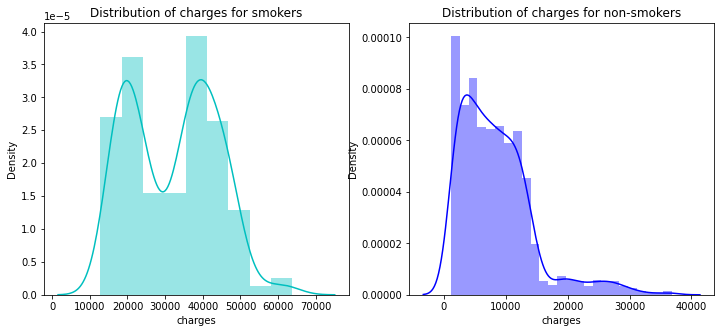

In [11]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == "yes")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == "no")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

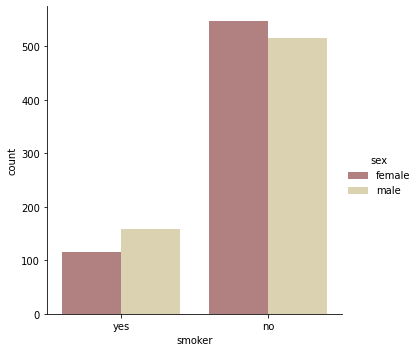

In [12]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

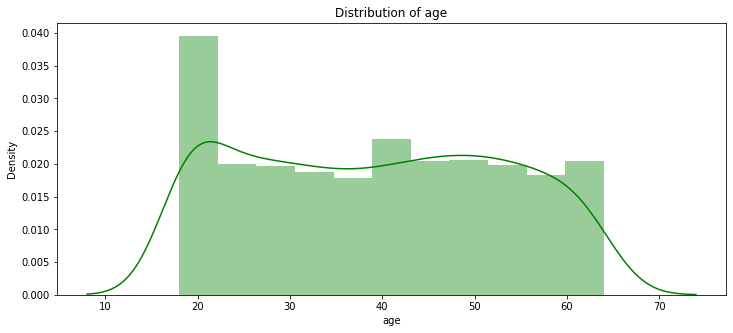

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (less than  or equal to 20 years old)')

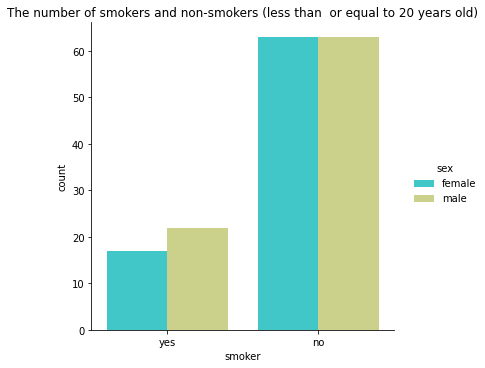

In [14]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age <= 20)])
plt.title("The number of smokers and non-smokers (less than  or equal to 20 years old)")

 18-20 years old - a very young age. Does smoking affect the cost of treatment at this age?

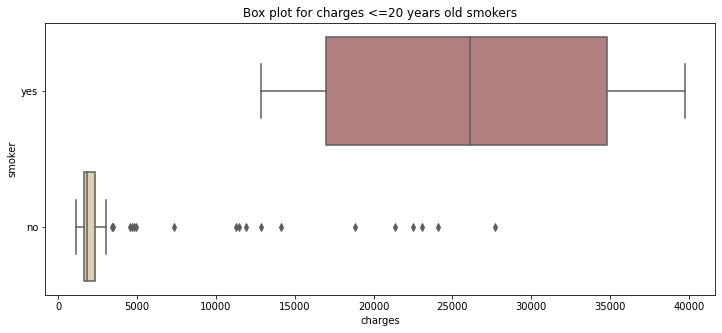

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges <=20 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age <= 20)] , orient="h", palette = 'pink')

 As we can see, even at the age of 20 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents. 

 Let's pay attention to bmi.

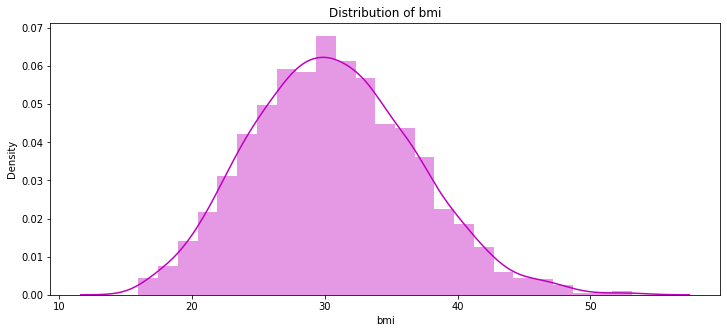

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

With a value equal to 30 starts obesity.

Let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

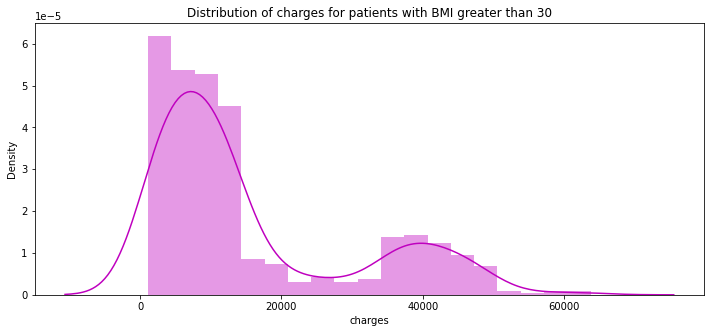

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

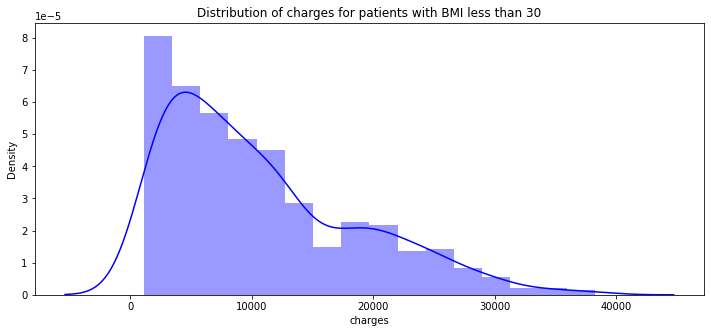

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Let's pay attention to children. First, let's see how many children our patients have.

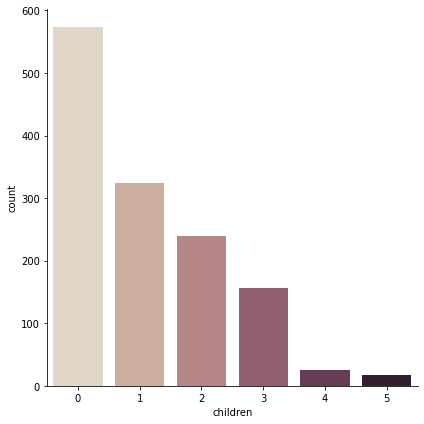

In [19]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcdcb1b90>,
      dtype=object)

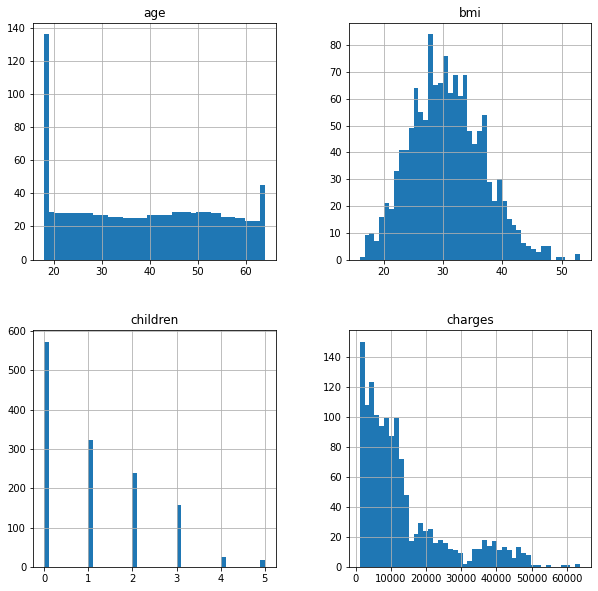

In [20]:
data[numerical + target].hist(bins=45, figsize=(10, 10))

The bmi distribution is close to normal. 


**Data preprocessing**

---



In [21]:
# Converting categorical variable into indicator variables.

X=data.iloc[:,0:6].values
Y=data.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1=LabelEncoder()
X[:,1]=labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2=LabelEncoder()
X[:,4]=labelencoder_X_2.fit_transform(X[:,4])
labelencoder_X_3=LabelEncoder()
X[:,5]=labelencoder_X_3.fit_transform(X[:,5])


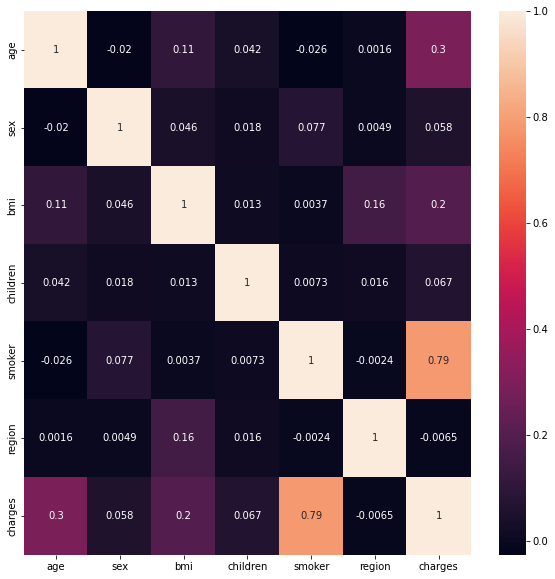

In [22]:
df = pd.DataFrame(np.c_[X,Y], columns =['age','sex','bmi','children','smoker','region','charges'],dtype = float) 
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
# print(data)

In [23]:
# using onehot encoder for region and droping one column
onehotencoder_3 = ColumnTransformer([("region", OneHotEncoder(), [5])], remainder = 'passthrough')
X =onehotencoder_3.fit_transform(X)
X = X[:, 1:]

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Now we are going to predict the cost of treatment using various **Machine Learning models**.



In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from numpy import mean
from numpy import std


Regression report

In [27]:
R2_Score=[]
MSE=[]
MAE=[]
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
    ]
    R2_Score.append(r2_score(y_true, y_pred))
    MSE.append(mean_squared_error(y_true, y_pred))
    MAE.append(mean_absolute_error(y_true, y_pred))
    print('Evaluation Metrics:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')

Linear Regression

In [28]:
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)

# 10 fold cross validation
print("Cross validation score of training data set:",cross_val_score(linear_regression, X_train, y_train,cv=10).mean())

y_pred=linear_regression.predict(X_test)

# regression report
regression_report(y_test,y_pred)

Cross validation score of training data set: 0.7350589896702482
Evaluation Metrics:
      mean absolute error:             4396.031
       mean squared error:         41546216.661
                 r2 score:                0.753


Decison tree regression

In [29]:
decision_tree=DecisionTreeRegressor(max_leaf_nodes=10)
decision_tree.fit(X_train,y_train)

# 10 fold cross validation
print("Cross validation score of training data set:",cross_val_score(decision_tree, X_train, y_train,cv=10).mean())

y_pred=decision_tree.predict(X_test)

# regression report
regression_report(y_test,y_pred)

Cross validation score of training data set: 0.8443393388641238
Evaluation Metrics:
      mean absolute error:             3102.589
       mean squared error:         27730305.438
                 r2 score:                0.835


Random Forest Regression

In [30]:
random_forest=RandomForestRegressor(max_leaf_nodes=10)
random_forest.fit(X_train,y_train)

# 10 fold cross validation
print("Cross validation score of training data set:",cross_val_score(random_forest, X_train, y_train,cv=10).mean())

y_pred=random_forest.predict(X_test)

# regression report
regression_report(y_test,y_pred)

Cross validation score of training data set: 0.8530297604577524
Evaluation Metrics:
      mean absolute error:             3028.090
       mean squared error:         26862310.260
                 r2 score:                0.840


KNeighborsRegressor

In [31]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

# 10 fold cross validation
print("Cross validation score of training data set:",cross_val_score(knn, X_train, y_train,cv=10).mean())

y_pred=knn.predict(X_test)

# regression report
regression_report(y_test,y_pred)

Cross validation score of training data set: 0.7731001542881967
Evaluation Metrics:
      mean absolute error:             3695.260
       mean squared error:         33728110.656
                 r2 score:                0.800


**Neural Netwok**

In [32]:
import keras
from keras.models import Sequential # initialise nerual network
from keras.layers import Dense #  to add diferent layers in NN

# initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(keras.Input(shape=(8,)))
model.add(Dense(5, activation='swish', kernel_initializer='uniform'))
model.add(Dense(5, activation='swish', kernel_initializer='uniform'))
model.add(Dense(1, activation='swish', kernel_initializer='uniform'))

# compilng the ANN
# from keras import backend as K

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

model.compile(optimizer='rmsprop', loss=root_mean_squared_error,metrics=['mse','mae'])

# Fit the ANN to the training set
# stochaistic gradient descent
model.fit(X_train, y_train, batch_size=1,epochs=100)

# 3- making the prediction and evaluating the model
y_predd=model.predict(X_test)


print("R2 score :--->>",r2_score(y_test,y_predd))

R2_Score.append(r2_score(y_test, y_predd))
MSE.append(mean_squared_error(y_test, y_predd))
MAE.append(mean_absolute_error(y_test, y_predd))

Epoch 1/100
1069/1069 [==============================] - 2s 2ms/step - loss: 13080.5986 - mse: 312029056.0000 - mae: 13080.5986
Epoch 2/100
1069/1069 [==============================] - 2s 2ms/step - loss: 13059.7441 - mse: 311514656.0000 - mae: 13059.7441
Epoch 3/100
1069/1069 [==============================] - 2s 2ms/step - loss: 13006.4941 - mse: 310180160.0000 - mae: 13006.4941
Epoch 4/100
1069/1069 [==============================] - 2s 2ms/step - loss: 12905.0498 - mse: 307676064.0000 - mae: 12905.0498
Epoch 5/100
1069/1069 [==============================] - 2s 1ms/step - loss: 12741.5332 - mse: 303654464.0000 - mae: 12741.5332
Epoch 6/100
1069/1069 [==============================] - 2s 1ms/step - loss: 12501.4941 - mse: 297911296.0000 - mae: 12501.4941
Epoch 7/100
1069/1069 [==============================] - 2s 2ms/step - loss: 12170.2852 - mse: 290132448.0000 - mae: 12170.2852
Epoch 8/100
1069/1069 [==============================] - 2s 2ms/step - loss: 11744.0869 - mse: 280319552

In [33]:
col={'R2_score':R2_Score}
print(col)
models=['Linear Regression','Decision Tree','Random Forest','KNN','ANN']
df_R2=pd.DataFrame(data=col,index=models)
df_R2

{'R2_score': [0.7530385567240128, 0.8351639017002683, 0.8403234892418667, 0.799511398242944, 0.8090469834734562]}


,R2_score
Linear Regression,0.753039
Decision Tree,0.835164
Random Forest,0.840323
KNN,0.799511
ANN,0.809047


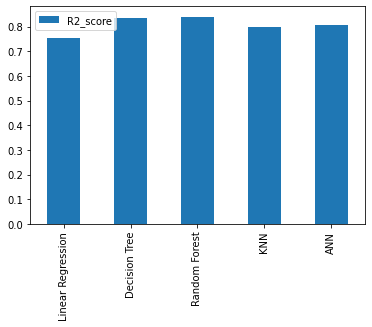

In [34]:
df_R2.plot(kind='bar')

In [35]:
col={'MeanAbsoluteError':MAE}
print(col)
models=['Linear Regression','Decision Tree','Random Forest','KNN','ANN']
df_error=pd.DataFrame(data=col,index=models)
df_error

{'MeanAbsoluteError': [4396.031406695098, 3102.588511366635, 3028.089829580364, 3695.2595249104475, 2891.9332420990627]}


,MeanAbsoluteError
Linear Regression,4396.031407
Decision Tree,3102.588511
Random Forest,3028.089830
KNN,3695.259525
ANN,2891.933242


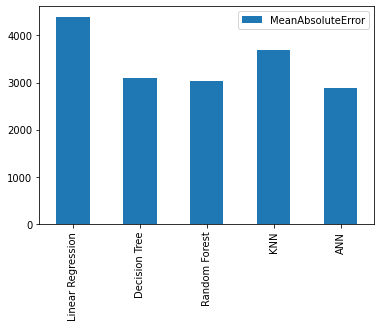

In [36]:
df_error.plot(kind='bar')